<a href="https://colab.research.google.com/github/ThaironyDev/Tratando_e_analisando_dados_com_pandas/blob/main/Desafio_limpeza_e_tratamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Você recebeu a tarefa de normalizar o seguinte arquivo JSON chamado “informacoes.json” referente a algumas informações de identificação de um cliente.

In [1]:
import pandas as pd

In [2]:
informacoes_json = {
  "nome": "João",
  "idade": 28,
  "enderecos": [
    {
      "tipo": "casa",
      "rua": "Rua A",
      "numero": 123,
      "cidade": "São Paulo"
    },
    {
      "tipo": "trabalho",
      "rua": "Rua B",
      "numero": 456,
      "cidade": "Rio de Janeiro"
    }
  ]
}


In [3]:
'''
Neste trecho estamos normalizando um dicionário aninhado submetendo-o ao método pd.json_normalize() neste caso estamos passando como parâmetros:
informacoes_json que é o dicionário;
record_path que são as colunas a serem normalizadas;
meta que são as colunas que devem ser mantidas.
A escolha das colunas deve estar pautada nas subcategorias do dicionário.

'''
dados = pd.json_normalize(informacoes_json, record_path=['enderecos'], meta=['nome', 'idade'])
dados

,tipo,rua,numero,cidade,nome,idade
0,casa,Rua A,123,São Paulo,João,28
1,trabalho,Rua B,456,Rio de Janeiro,João,28


###Sua tarefa é realizar alguns tratamentos e deixar esse arquivo JSON como um Pandas DataFrame, sem dados vazios e com a tipagem das colunas de forma correta. Como isso pode ser feito?

In [4]:
import requests, json, pandas as pd

In [5]:
url = 'https://caelum-online-public.s3.amazonaws.com/2929-pandas/dados.json'
response = requests.get(url)
response.status_code
content = response.content

In [6]:

dados_dict = json.loads(content)
dados = pd.json_normalize(dados_dict, record_path='pessoas')
dados

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo
1,Maria,30,[21 3333-3333],,456,Rio de Janeiro


In [7]:
dados.columns

Index(['nome', 'idade', 'telefones', 'endereco.rua', 'endereco.numero',
       'endereco.cidade'],
      dtype='object')

In [8]:
'''Como solicitado o dataframe não pode ter valores nulos e como o endereço não pode ser trabalhado nessa situação vamos retirar esse registro'''
dados = dados[dados['endereco.rua'] != ''].copy()

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             1 non-null      object
 1   idade            1 non-null      object
 2   telefones        1 non-null      object
 3   endereco.rua     1 non-null      object
 4   endereco.numero  1 non-null      int64 
 5   endereco.cidade  1 non-null      object
dtypes: int64(1), object(5)
memory usage: 56.0+ bytes


In [10]:
'''Alterando o tipo dos dados usando uma função lambda no método apply e astype()'''
dados['idade'] = dados['idade'].apply(lambda x: pd.to_numeric(x, errors = 'coerce')).astype(int)
dados

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo


In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             1 non-null      object
 1   idade            1 non-null      int64 
 2   telefones        1 non-null      object
 3   endereco.rua     1 non-null      object
 4   endereco.numero  1 non-null      int64 
 5   endereco.cidade  1 non-null      object
dtypes: int64(2), object(4)
memory usage: 56.0+ bytes


###Você foi informado que esses dados podem apresentar problemas que podem prejudicar a análise e interpretação correta dos dados.Para resolver isso, foi solicitado que você identifique e remova as amostras que apresentam os seguintes problemas:

In [12]:
import requests, json, pandas as pd, numpy as np

In [13]:
url = 'https://caelum-online-public.s3.amazonaws.com/2929-pandas/cursos_cadastrados.json'

###Valores nulos: são valores ausentes em algumas das colunas que devem ser preenchidos para que a análise seja correta.

In [14]:
response = requests.get(url)
response.status_code
content = response.content

In [15]:
dados_dict = json.loads(content)
dados = pd.json_normalize(dados_dict)
selecao = dados.isna().any(axis=1)
selecao

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool

In [16]:
dados

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [17]:

dados.drop(index=dados[selecao].index, axis='index', inplace=True)

###Duplicatas: registros iguais que podem prejudicar a análise dos dados, já que estão representando a mesma informação.

In [18]:
dados.duplicated().sum()

1

In [19]:
dados.drop_duplicates(inplace=True)
dados

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,


###Strings vazias: valores de texto que não apresentam nenhum conteúdo escrito, o que pode dificultar a análise de dados, principalmente se a coluna tiver muitos valores assim.

In [20]:
selecao = dados[dados.apply(lambda x: x == '').any(axis=1)].index
dados.drop(index = selecao, axis='index', inplace=True)
dados


,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777


###Conversão de tipos: algumas colunas do arquivo podem estar no tipo de dados errado, como texto em vez de número, o que pode prejudicar a análise. Nesse caso você deve realizar a conversão para o tipo correto de cada coluna.

In [21]:
import datetime
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               2 non-null      object
 1   categoria           2 non-null      object
 2   carga_horaria       2 non-null      object
 3   concluintes         2 non-null      object
 4   data_inicio         2 non-null      object
 5   data_conclusao      2 non-null      object
 6   descricao           2 non-null      object
 7   preco               2 non-null      object
 8   instrutor.nome      2 non-null      object
 9   instrutor.email     2 non-null      object
 10  instrutor.telefone  2 non-null      object
dtypes: object(11)
memory usage: 192.0+ bytes


In [22]:
dados['concluintes'] = dados['concluintes'].apply(lambda x: pd.to_numeric(x, errors='coerce')).astype(int)
dados['data_inicio'] = dados['data_inicio'].apply(lambda x: pd.to_datetime(x, format='%Y/%m/%d'))
dados['data_conclusao'] = dados['data_conclusao'].apply(lambda x: pd.to_datetime(x, format='%Y/%m/%d'))
dados['preco'] = dados['preco'].apply(lambda x: pd.to_numeric(x, errors='coerce')).astype(float)

In [23]:
dados

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.9,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777


In [24]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   curso               2 non-null      object        
 1   categoria           2 non-null      object        
 2   carga_horaria       2 non-null      object        
 3   concluintes         2 non-null      int64         
 4   data_inicio         2 non-null      datetime64[ns]
 5   data_conclusao      2 non-null      datetime64[ns]
 6   descricao           2 non-null      object        
 7   preco               2 non-null      float64       
 8   instrutor.nome      2 non-null      object        
 9   instrutor.email     2 non-null      object        
 10  instrutor.telefone  2 non-null      object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 192.0+ bytes


###Foi informado que nessa base de dados há possíveis fraudes que podem ser identificadas através dos outliers no “valor da transação”. Basicamente a fraude seria um outlier.


---



---


Sua missão é construir uma função que recebe dois parâmetros, a coluna que você quer analisar se tem outlier e o DataFrame em questão. A intenção de fazer isso é aproveitar novamente essa função tanto para outras colunas quanto para outros DataFrames futuramente em outras análises. O método que deve ser implementado para identificação do outlier é do intervalo interquartil.

In [25]:
import pandas as pd

# criando um DataFrame com 30 transações aleatórias
df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150,
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250,
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})

In [26]:
df.describe()

,ID da transação,Valor da transação
count,30.000000,30.000000
mean,15.500000,325.633333
std,8.803408,214.442579
min,1.000000,100.000000
25%,8.250000,200.000000
50%,15.500000,250.000000
75%,22.750000,400.000000
max,30.000000,913.000000


In [27]:
def calcula_outliers(coluna, df):
    Q1 = df[coluna].quantile(.25)
    Q3 = df[coluna].quantile(.75)
    IQR = Q3 - Q1
    CONST = 1.5
    limite_inferior = Q1 - CONST * IQR
    limite_superior = Q3 + CONST * IQR
    print(f'Limite inferior: {limite_inferior}')
    print(f'Limite superior: {limite_superior}')
    return (df[coluna] < limite_inferior) | (df[coluna] > limite_superior)

In [28]:
outliers = calcula_outliers('Valor da transação', df)

Limite inferior: -100.0
Limite superior: 700.0


In [29]:
df[outliers]

,ID da transação,Valor da transação,Data da transação,Local da transação
5,6,913,2022-01-06,"Nova Iorque, EUA"
16,17,805,2022-01-17,"Los Angeles, EUA"
28,29,800,2022-01-29,"Miami, EUA"


In [30]:
import seaborn as sns

<Axes: xlabel='Valor da transação'>

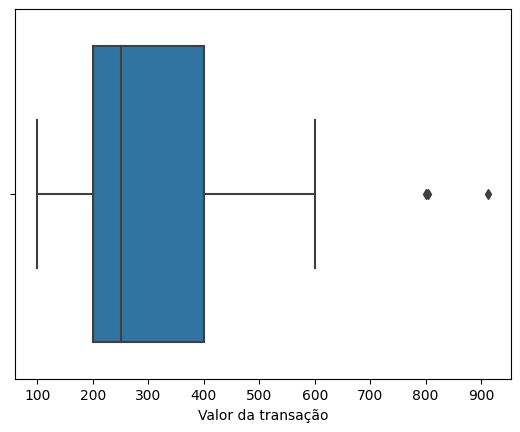

In [31]:
sns.boxplot(x=df['Valor da transação'])

<Axes: xlabel='Valor da transação'>

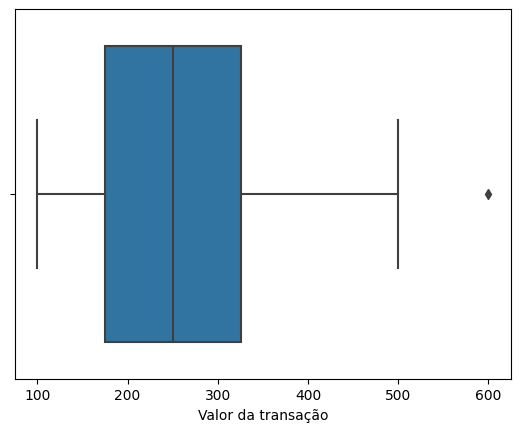

In [32]:
sns.boxplot(x=df['Valor da transação'][~outliers])

In [33]:
df2 = df[~outliers].copy()

In [34]:
outliers2 = calcula_outliers('Valor da transação', df2)

Limite inferior: -50.75
Limite superior: 551.25


In [35]:
df2[outliers2]

,ID da transação,Valor da transação,Data da transação,Local da transação
23,24,600,2022-01-24,"São Paulo, Brasil"


<Axes: xlabel='Valor da transação'>

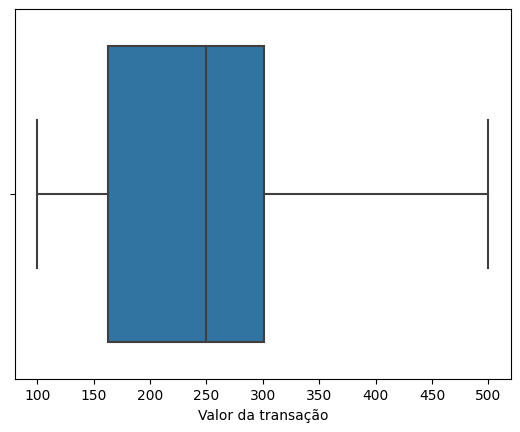

In [36]:
sns.boxplot(x=df2.loc[~outliers2, 'Valor da transação'])